## Poisson equation 1D
\begin{equation}
    \begin{cases}
	-u'' = f(x) &\text{ in } \Omega = [0,1] \\
	 u(0) = u(1) = 0 & 
	\end{cases}
\end{equation}

In [1]:
import numpy as np

\begin{align*}
u(x) &= sin(\pi x)\\
f(x) &= \pi^2\sin(\pi x)
\end{align*}

In [2]:
u_ex = lambda x: np.sin(np.pi * x)
f = lambda x: np.pi ** 2 * np.sin(np.pi * x)
u_D = lambda x: np.zeros_like(x)

In [3]:
from mozart.mesh.rectangle import interval
nrElems = 7
degree = 1
c4n, n4e, n4db, ind4e = interval(0, 1, nrElems, degree)

In [4]:
c4n

array([ 0.        ,  0.14285714,  0.28571429,  0.42857143,  0.57142857,
        0.71428571,  0.85714286,  1.        ])

In [5]:
from mozart.poisson.fem.interval import solve
u = solve(c4n, n4e, n4db, ind4e, f, u_D, degree)

In [6]:
u

array([ 0.        ,  0.42667492,  0.76884164,  0.95872984,  0.95872984,
        0.76884164,  0.42667492,  0.        ])

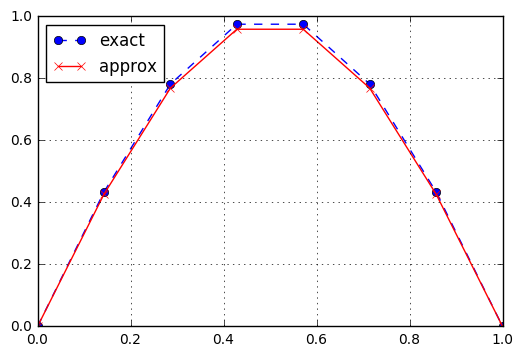

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(c4n, u_ex(c4n), 'bo--', label='exact')
plt.plot(c4n, u, 'rx-', label='approx')
plt.grid(True)
plt.legend(loc=2)

### Error Convergence

In [8]:
f = lambda x: np.pi ** 2 * np.sin(np.pi * x)
u_D = lambda x: np.zeros_like(x)
exact_u = lambda x: np.sin(np.pi * x)
exact_ux = lambda x: np.pi * np.cos(np.pi * x)

In [9]:
from mozart.poisson.fem.interval import computeError

In [10]:
for degree in range(1, 6):
    print("Degree of Polynomial = {0}".format(degree))
    nrElems = 3
    for it in range(0, 4):
        nrElems *= 2
        c4n, n4e, n4db, ind4e = interval(0, 1, nrElems, degree)
        u = solve(c4n, n4e, n4db, ind4e, f, u_D, degree)
        L2, sH1 = computeError(c4n, n4e, ind4e, exact_u, exact_ux, u, degree, degree + 3)
        print("L2 = {0:12.10f}, H1 = {1:12.10f}".format(L2, sH1))
    print("=====================================")

Degree of Polynomial = 1
L2 = 0.0323728529, H1 = 0.3378838486
L2 = 0.0082306511, H1 = 0.1681670719
L2 = 0.0020663224, H1 = 0.0839784610
L2 = 0.0005171229, H1 = 0.0419758340
Degree of Polynomial = 2
L2 = 0.0005907883, H1 = 0.0226088307
L2 = 0.0000731873, H1 = 0.0056686738
L2 = 0.0000091274, H1 = 0.0014182070
L2 = 0.0000011403, H1 = 0.0003546168
Degree of Polynomial = 3
L2 = 0.0000193160, H1 = 0.0010014343
L2 = 0.0000012139, H1 = 0.0001254561
L2 = 0.0000000760, H1 = 0.0000156906
L2 = 0.0000000047, H1 = 0.0000019616
Degree of Polynomial = 4
L2 = 0.0000004448, H1 = 0.0000330369
L2 = 0.0000000139, H1 = 0.0000020691
L2 = 0.0000000004, H1 = 0.0000001294
L2 = 0.0000000000, H1 = 0.0000000081
Degree of Polynomial = 5
L2 = 0.0000000103, H1 = 0.0000008697
L2 = 0.0000000002, H1 = 0.0000000272
L2 = 0.0000000000, H1 = 0.0000000009
L2 = 0.0000000000, H1 = 0.0000000000
